<a href="https://colab.research.google.com/github/tliemne/HIT_JAVA_PUBLIC_2023/blob/main/finalHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi các bạn, cũng đã đến những buổi cuối cùng của lớp Python Private, chúng ta đã đi qua nhiều kiến thức cơ bản cũng như các thư viện hữu dụng cho hướng phát triển của lớp sau này, bài tập này là bài tập tổng hợp lại kiến thức cho các bạn trước khi bước vào bài tập lớn cuối khóa nhé.

Yêu cầu chung cho bài tập như sau:
- Tạo folder finalHomework trên drive của mình, tạo bản sao từ google colab này và lưu lại trong đó
- Ở các vị trị có dấu ... các bạn sẽ thay thế nó bằng câu lệnh phù hợp nhé
- Có thể thêm cell code để tách rời các đoạn code cho rõ ràng hơn
- Link dataset:
  + Fifa World Cup 2022 Qatar: [data](https://drive.google.com/drive/folders/1toqv_FTlsi6-NfswfzKnK9GBYAE8i57L?usp=sharing)

Anh mong các bạn sẽ làm bài tập đầy đủ để có thể review lại kiến thức của bản thân nhé !!!

Yêu các bạn <3



# Set up

## Import các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Kết nối với google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Di chuyển đến thư mục chứa google colab

## Upload file

In [24]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

## List các file trong thư mục

In [ ]:
all_items = os.listdir()
for i in all_items:
  print(all_items)

['.config', 'drive', 'sample_data']
['.config', 'drive', 'sample_data']
['.config', 'drive', 'sample_data']


# Numpy

In [ ]:
# Init
import random
import numpy as np

prices = list(range(1, 1000000))
random.shuffle(prices)

In [ ]:
# hàm ban đầu
def find_max_down_fall(prices):
  min_right_to_left = [0 for i in range((len(prices)))]

  min_so_far = float('inf')
  for i in range(len(prices) -1, -1, -1):
    min_so_far = min(prices[i], min_so_far)
    min_right_to_left[i] = min_so_far

  res = 0
  for i, buy in enumerate(prices):
    worst_sell = min_right_to_left[i]
    down_fall = (buy - worst_sell) / buy
    res = max(res, down_fall)

  return res

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall
%timeit find_max_down_fall(prices)

820 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# hàm sau khi được viết lại bằng numpy
def find_max_down_fall_np(prices_np):
  # start your code here
  min_right_to_left = np.minimum.accumulate(prices[::-1])[::-1]

  res = np.max((prices - min_right_to_left) / prices)

  return res
  # end your code

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall sau khi được viết lại bằng numpy với thời gian kì vọng nhanh hơn khoảng 100 lần
# start your code here
prices_np = np.array([prices])
# end your code

%timeit find_max_down_fall_np(prices_np)

In [ ]:
# so sánh kết quả
find_max_down_fall(prices) == find_max_down_fall_np(prices_np)

# Pandas + Matplotlib

## Gọi file csv

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/matches_world_cup_2022_catar.csv')
df_matches = df.drop('events_list', axis=1)
df_events = df[['match_id', 'team_name_home',	'team_name_away', 'events_list']]

## Hiển thị 5 dòng đầu của dataframe

In [48]:

df_matches.head()


,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.03,0.33,1002364,Lusail Iconic Stadium,"[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.04,0.54,367156,Khalifa International Stadium,"[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
2,3,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,...,0.03,0.39,720768,Al Bayt Stadium,"[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,0.04,0.25,792326,Lusail Iconic Stadium,"[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,0.05,0.55,672577,Al Bayt Stadium,"[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."


In [49]:
df_events.head()

,match_id,team_name_home,team_name_away,events_list
0,1,Argentina,France,"[{'event_team': 'home', 'event_time': "" 23' "",..."
1,2,Croatia,Morocco,"[{'event_team': 'home', 'event_time': "" 7' "", ..."
2,3,France,Morocco,"[{'event_team': 'home', 'event_time': "" 5' "", ..."
3,4,Argentina,Croatia,"[{'event_team': 'away', 'event_time': "" 32' "",..."
4,5,England,France,"[{'event_team': 'away', 'event_time': "" 17' "",..."


## Hiển thị 5 dòng cuối của các dataframe

In [35]:

df_matches.tail()
df_events.head()

,match_id,team_name_home,team_name_away,events_list
0,1,Argentina,France,"[{'event_team': 'home', 'event_time': "" 23' "",..."
1,2,Croatia,Morocco,"[{'event_team': 'home', 'event_time': "" 7' "", ..."
2,3,France,Morocco,"[{'event_team': 'home', 'event_time': "" 5' "", ..."
3,4,Argentina,Croatia,"[{'event_team': 'away', 'event_time': "" 32' "",..."
4,5,England,France,"[{'event_team': 'away', 'event_time': "" 17' "",..."


## In ra thông tin của từng dataframe

In [30]:
print(df_matches)

    match_id                    stage        date   pens pens_home_score  \
0          1                    Final  18/12/2022   True               4   
1          2    Match for third place  17/12/2022  False           False   
2          3              Semi-finals  14/12/2022  False           False   
3          4              Semi-finals  13/12/2022  False           False   
4          5           Quarter-finals  10/12/2022  False           False   
..       ...                      ...         ...    ...             ...   
59        60  Group stage: Matchday 1  22/11/2022  False           False   
60        61  Group stage: Matchday 1  21/11/2022  False           False   
61        62  Group stage: Matchday 1  21/11/2022  False           False   
62        63  Group stage: Matchday 1  21/11/2022  False           False   
63        64  Group stage: Matchday 1  20/11/2022  False           False   

   pens_away_score team_name_home team_name_away  team_home_score  \
0                2

In [38]:
null_values = df_matches.isnull().sum()

- Hãy kiểm tra xem các data frame có giá trị null không
- Nếu có hãy trình bày cách giải quyết của bản thân đối với dữ liệu null đó, và code cách giải quyết dưới cell code bên dưới
- Nếu không có cách giải quyết thì cũng ghi là không có cách giải quyết


Ghi cách giải quyết của bản thân vào đây: ...

## Lấy ra các trận đấu có từ 3 bàn thắng trở lên (ghi ra tên cặp đấu)

In [ ]:
df_matches[df_matches['team_home_score'] >= 3][['team_name_home','team_name_away']]

## Thống kê các sân vận động diễn ra các trận đấu và hiển thị tỷ lệ phần trăm của các sân vận động bằng biểu đồ thích hợp

In [ ]:
...

## Lấy ra tên của các đội tham dự giải đấu

In [40]:
name = df_matches['team_name_home'].drop_duplicates()

print("\nTên của các đội tham dự giải đấu:")
print(name)


Tên của các đội tham dự giải đấu:
0        Argentina
1          Croatia
2           France
4          England
5          Morocco
6      Netherlands
8         Portugal
10          Brazil
11           Japan
16        Cameroon
17          Serbia
18     South Korea
19           Ghana
21      Costa Rica
23          Canada
24          Poland
25    Saudi Arabia
26         Tunisia
27       Australia
28           Wales
29            Iran
31         Ecuador
36           Spain
38         Belgium
46           Qatar
50         Uruguay
51     Switzerland
54         Germany
57          Mexico
58         Denmark
60             USA
61         Senegal
Name: team_name_home, dtype: object


## Lấy ra số bàn thắng được ghi bởi các đội

In [41]:
total_scores_home = df_matches.groupby('team_name_home')['team_home_score'].sum()
total_scores_away = df_matches.groupby('team_name_away')['team_away_score'].sum()

sum_all_scores = total_scores_home + total_scores_away
print("\nsố bàn thắng được ghi bởi các đội:")

print(sum_all_scores)


số bàn thắng được ghi bởi các đội:
team_name_home
Argentina       15
Australia        4
Belgium          1
Brazil           8
Cameroon         4
Canada           2
Costa Rica       3
Croatia          8
Denmark          1
Ecuador          4
England         13
France          16
Germany          6
Ghana            5
Iran             4
Japan            5
Mexico           2
Morocco          6
Netherlands     10
Poland           3
Portugal        12
Qatar            1
Saudi Arabia     3
Senegal          5
Serbia           5
South Korea      5
Spain            9
Switzerland      5
Tunisia          1
USA              3
Uruguay          2
Wales            1
dtype: int64


## Vẽ biểu đồ thể hiện số bàn thắng được ghi bởi mỗi đội (tự chọn kiểu biểu đồ phù hợp)

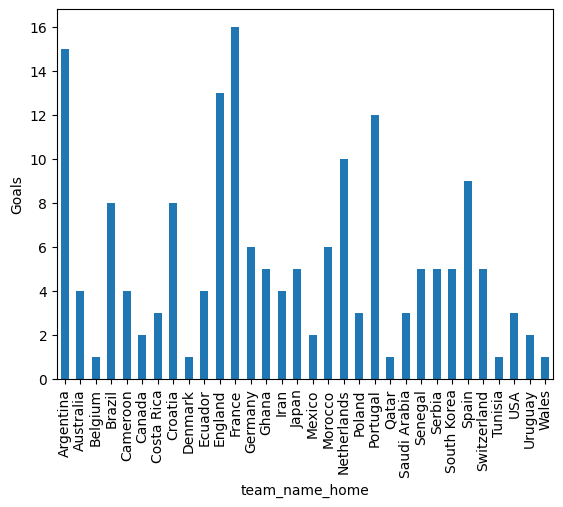

In [45]:
sum_all_scores.plot(kind='bar')
plt.ylabel("Goals");

##Thống kê số lượng bàn thắng được ghi bởi các cầu thủ Argentina bằng biểu đồ tròn

- Yêu cầu phải có tiêu đề cho biểu đồ, chú thích
- Có tỷ lệ phần trăm cho từng cầu thủ
- Tách phần của Alexis Mac Allister ra khỏi biểu đồ

In [ ]:
...

## Thống kê tỷ lệ ra sân của các cầu thủ Pháp bằng biểu đồ

In [ ]:
...

## Thống kê danh sách top 10 vua phá lưới của giải đấu
- Nếu trường hợp hai cầu thủ có cùng số bàn thắng thì chọn cầu thủ có số lượng kiến tạo nhiều hơn
- Sử dụng biểu đồ thích hợp để hiển thị số bàn thắng của top 10

In [ ]:
...

# OpenCV

## Tìm bounding box cho các chữ số trong bức ảnh sau: [ảnh](https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png)

- Gợi ý các hàm sử dụng:
  - cv2.threshold
  - cv2.findContours
  - cv2.contourArea
  - cv2.boundingRect

Và các hàm trong thư viện OpenCV đã học hôm trước

In [ ]:
...

Thực hiện vẽ logo của CLB Tin Học HIT bằng OpenCV: [Vẽ logo](https://docs.google.com/document/d/1Wfg10lmyVPzGpCa6BWcMd3fpjYD3OGohoyjzy_JfcWc/edit?usp=sharing)

In [ ]:
import numpy as np
import cv2
img = np.zeros((450, 350, 3), dtype=np.uint8)

Thực hiện các yêu cầu sau đối với ảnh logo mà bạn vừa vẽ:
- Làm mịn ảnh
- Làm mờ ảnh

Sử dụng các hàm gợi ý sau:
- cv2.filter2D
- cv2.blur
- cv2.GaussianBlur
- cv2.medianBlur
- cv2.bilateralFilter

In [ ]:
...